In [46]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

In [47]:
#Storing the transaction details for year 2016
trainDf = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
trainDf.shape

(90275, 3)

In [48]:
#Storing the property details for year 2016
propDf = pd.read_csv("properties_2016.csv")
propDf.shape

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

### Exploring the Transaction Data

In [49]:
trainDf.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


#### Scatter Plot of Logerror to find the outliers

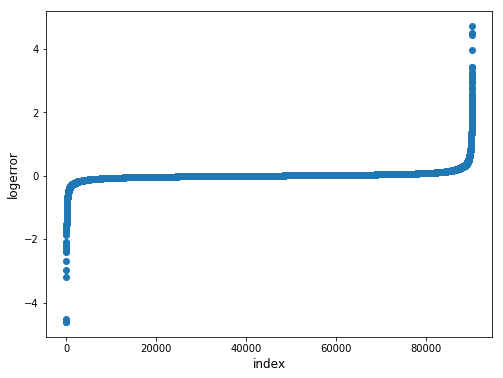

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(range(trainDf.shape[0]), np.sort(trainDf.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

#### Removing the Outliers 

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


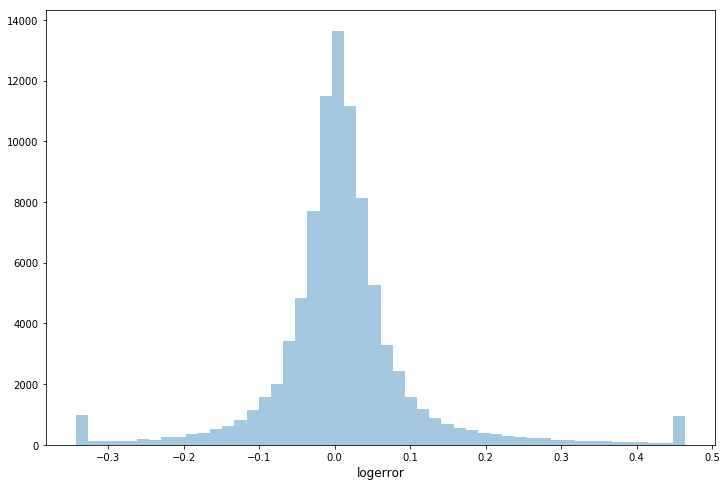

In [51]:

upperlimit = np.percentile(trainDf.logerror.values, 99)
lowerlimit = np.percentile(trainDf.logerror.values, 1)
trainDf['logerror'].ix[trainDf['logerror']>upperlimit] = upperlimit
trainDf['logerror'].ix[trainDf['logerror']<lowerlimit] = lowerlimit

plt.figure(figsize=(12,8))
sns.distplot(trainDf.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

#### Transactions happened each month 

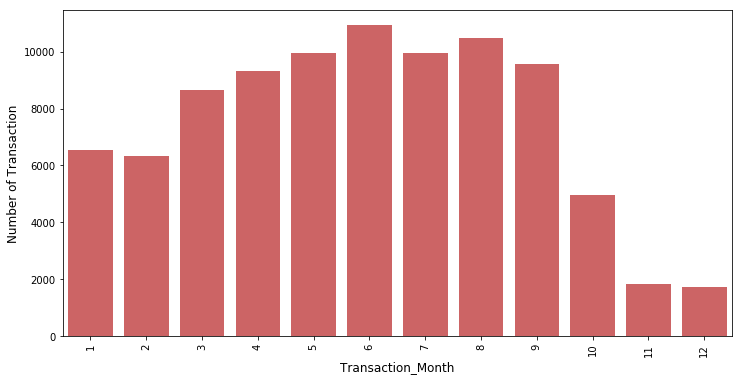

In [52]:

trainDf['transaction_month'] = trainDf['transactiondate'].dt.month

Count = trainDf['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(Count.index, Count.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Transaction_Month', fontsize=12)
plt.ylabel('Number of Transaction', fontsize=12)
plt.show()

### Exploring the Properties Data

In [53]:
propDf.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


#### Printing the missing value count for all the features in properties file

In [54]:
missingDf = propDf.isnull().sum(axis=0).reset_index()
missingDf.columns = ['column_name', 'missing_count']
missingDf = missingDf.ix[missingDf['missing_count']>0]
missingDf = missingDf.sort_values(by='missing_count')
print(missingDf)


                     column_name  missing_count
35        rawcensustractandblock          11437
25                     longitude          11437
24                      latitude          11437
37                regionidcounty          11437
17                          fips          11437
33         propertylandusetypeid          11437
52                assessmentyear          11439
5                     bedroomcnt          11450
4                    bathroomcnt          11462
40                       roomcnt          11475
32     propertycountylandusecode          12277
39                   regionidzip          13980
54                     taxamount          31250
51             taxvaluedollarcnt          42550
50    structuretaxvaluedollarcnt          54982
11  calculatedfinishedsquarefeet          55565
47                     yearbuilt          59928
36                  regionidcity          62845
53         landtaxvaluedollarcnt          67733
57           censustractandblock        

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


#### Now the same is plotted using bar graph to give a visual perspective

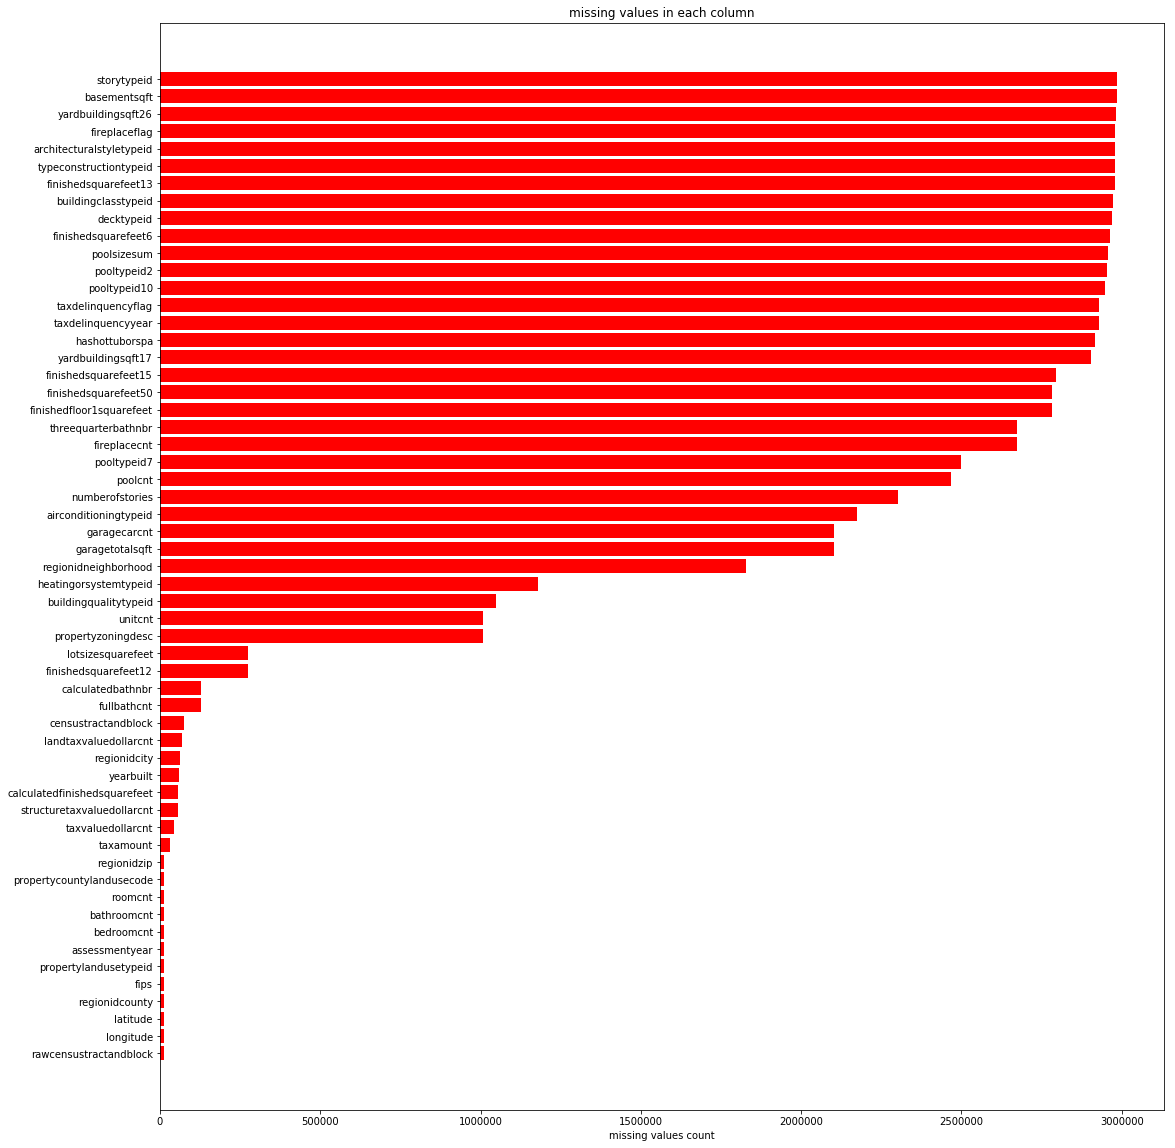

In [55]:
index = np.arange(missingDf.shape[0])
width = 1
fig, ax = plt.subplots(figsize=(18,20))
rects = ax.barh(index, missingDf.missing_count.values, color='red')
ax.set_yticks(index)
ax.set_yticklabels(missingDf.column_name.values, rotation='horizontal')
ax.set_xlabel("missing values count")
ax.set_title("missing values in each column")
plt.show()

#### Merge two dataframes based on parcelid

In [56]:
train_data= pd.merge(trainDf, propDf, on='parcelid', how='left')
print ("Shape Of Train: ",train_data.shape)
train_data.head()


Shape Of Train:  (90275, 61)


,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### Display the data types of all the columns in the merged dataframe

In [57]:

pd.options.display.max_rows = 65

DFdtype= train_data.dtypes.reset_index()
DFdtype.columns = ["Column", "data_type"]
DFdtype

,Column,data_type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


#### We group by data type to see the count of each data type

In [58]:
DFdtype.groupby("data_type").aggregate("count").reset_index()

,data_type,Column
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


#### Select columns with object type and printing their unique values

In [59]:
object_data =train_data.select_dtypes(include=['object'])
object_data.columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [60]:
train_y = train_data['logerror'].values

In [61]:
for col in object_data:
    print( col ," ", train_data[col].unique())

hashottuborspa   [nan True]
propertycountylandusecode   ['0100' '1' '010C' '122' '1129' '34' '1128' '010E' '0104' '0101' '0200'
 '0700' '1111' '01DC' '010D' '1110' '0400' '012C' '010V' '1116' '01HC'
 '010G' '0300' '010F' '1117' '0103' '38' '1210' '0111' '010M' '96' '135'
 '0108' '1014' '1112' '0201' '0109' '1310' '010H' '1410' '1222' '1321'
 '1720' '1011' '1432' '0401' '0102' '012D' '73' '105' '0110' '100V' '0130'
 '8800' '0303' '0210' '1012' '1333' '0114' '01DD' '020G' '040A' '012E'
 '020M' '040V' '070D' '1200' '030G' '1722' '6050' '1421' '010' nan '200'
 '0' '1420' '0131' '0301']
propertyzoningdesc   ['LARS' nan 'PSR6' ..., 'SHCG' 'COR2YY' 'LNR2RPD-R3']
fireplaceflag   [nan True]
taxdelinquencyflag   [nan 'Y']


we can see that most of the object columns have null values and has no importance in the data 

 hashottuborspa, propertyzoningdesc, fireplaceflag, taxdelinquencyflag

#### As Latitude & Longitude have least mising value count, we chek their relation with logerror

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


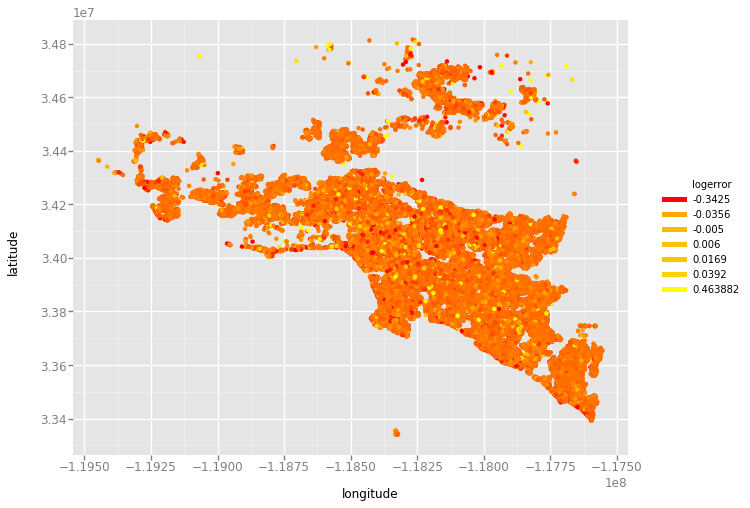

<ggplot: (149598201976)>

In [62]:
from ggplot import *
ggplot(aes(x='longitude', y='latitude', color='logerror'), data=train_data) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'yellow')

There is not much information available with this plot

#### Generating the missing value ration for all the columns

In [63]:
missing_data = train_data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column', 'missing']
missing_data['MissingRatio'] = missing_data['missing'] / train_data.shape[0]
missing_data.ix[missing_data['MissingRatio']>0.9].reset_index()

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,index,column,missing,MissingRatio
0,5,architecturalstyletypeid,90014,0.997109
1,6,basementsqft,90232,0.999524
2,9,buildingclasstypeid,90259,0.999823
3,12,decktypeid,89617,0.992711
4,13,finishedfloor1squarefeet,83419,0.924054
5,16,finishedsquarefeet13,90242,0.999634
6,17,finishedsquarefeet15,86711,0.960521
7,18,finishedsquarefeet50,83419,0.924054
8,19,finishedsquarefeet6,89854,0.995336
9,25,hashottuborspa,87910,0.973802


We can see from the above data that 19 features have missing data of 90%

#### We will now ipute the missing values with mean of the feature inorder to compute correlation coefficients

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


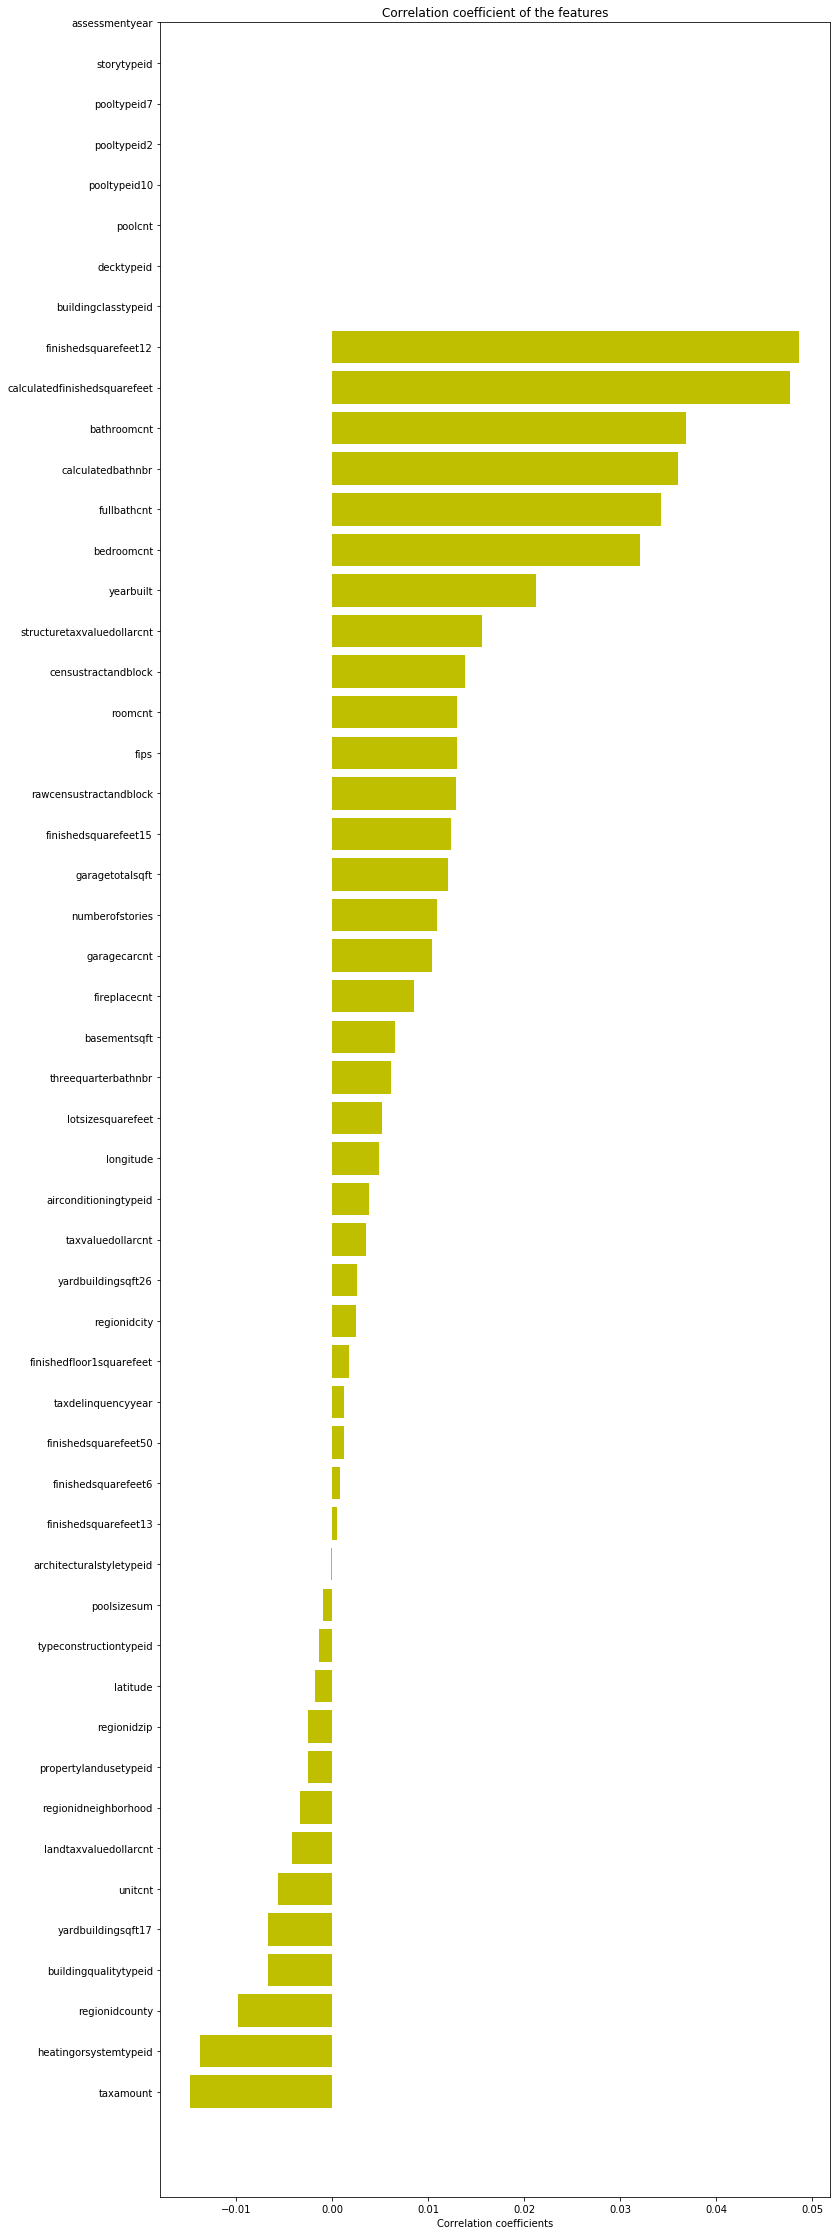

In [64]:
meanValues = train_data.mean(axis=0)
train_data_new = train_data.fillna(meanValues, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
floatCols = [col for col in train_data_new.columns if col not in ['logerror'] if train_data_new[col].dtype=='float64']

labels = []
values = []
for col in floatCols:
    labels.append(col)
    values.append(np.corrcoef(train_data_new[col].values, train_data_new.logerror.values)[0,1])
corrDf = pd.DataFrame({'column_Labels':labels, 'correlation_Values':values})
corrDf = corrDf.sort_values(by='correlation_Values')
    
index = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(index, np.array(corrDf.correlation_Values.values), color='y')
ax.set_yticks(index)
ax.set_yticklabels(corrDf.column_Labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficients")
ax.set_title("Correlation coefficient of the features")
#autolabel(rects)
plt.show()

#### Logerror has very less correlation with the provided variables.

##### Some variables can be seen without any correlation,may be since they would be having only one unique value, will confirm the same now.

In [65]:
zeroCorrCols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in zeroCorrCols:
    print(col, len(train_data_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


#### Now we consider the highly correlated values

In [66]:
high_corr_col = corrDf.ix[(corrDf['correlation_Values']>0.03) | (corrDf['correlation_Values'] < -0.006)]
high_corr_col.reset_index()

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,index,column_Labels,correlation_Values
0,49,taxamount,-0.014768
1,21,heatingorsystemtypeid,-0.013732
2,33,regionidcounty,-0.009844
3,6,buildingqualitytypeid,-0.006648
4,41,yardbuildingsqft17,-0.006643
5,4,bedroomcnt,0.032035
6,18,fullbathcnt,0.034267
7,7,calculatedbathnbr,0.036019
8,3,bathroomcnt,0.036862
9,10,calculatedfinishedsquarefeet,0.047659


#### So we print the heat map for these fetaures

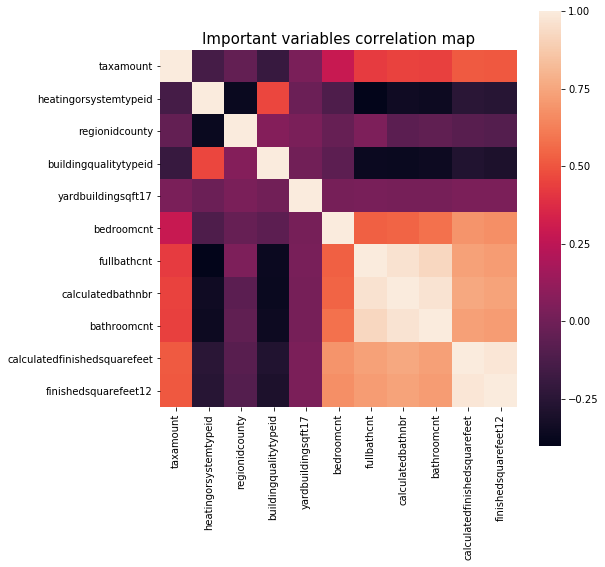

In [67]:
column_used = high_corr_col.column_Labels.tolist()

temp_df = train_data[column_used]
corr_matrix = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corr_matrix, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

From the heat map we found that some features are highly coorelated,
so now we plot each features coorelation with the logerror

##### FinishedSqaurefeet12

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


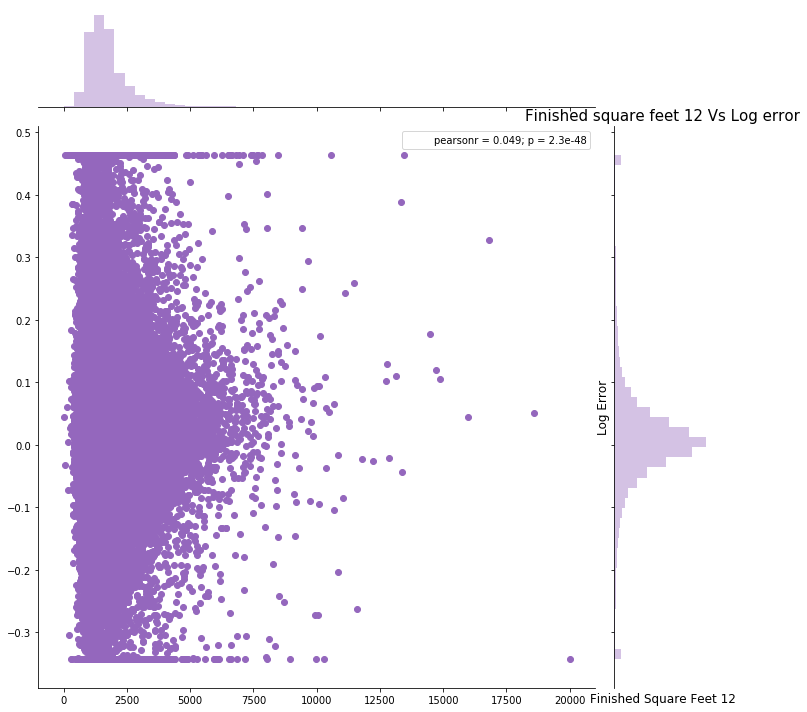

In [68]:
column = "finishedsquarefeet12"
UpperLimit = np.percentile(train_data[col].values, 99.5)
LowerLimit = np.percentile(train_data[col].values, 0.5)
train_data[col].ix[train_data[col]>UpperLimit] = UpperLimit
train_data[col].ix[train_data[col]<LowerLimit] = LowerLimit

plt.figure(figsize=(10,10))
sns.jointplot(x=train_data.finishedsquarefeet12.values, y=train_data.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

As houses are getting larger variance of logerror is getting reduced

##### CalculateFinishedSqaureFeet

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


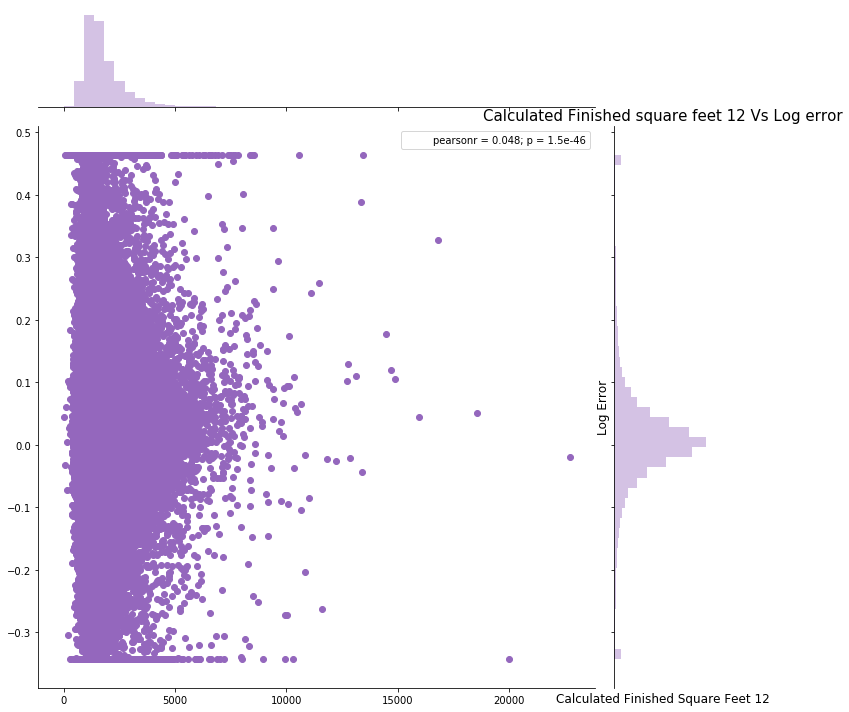

In [69]:
column = "calculatedfinishedsquarefeet"
UpperLimit = np.percentile(train_data[col].values, 99.5)
LowerLimit = np.percentile(train_data[col].values, 0.5)
train_data[col].ix[train_data[col]>UpperLimit] = UpperLimit
train_data[col].ix[train_data[col]<LowerLimit] = LowerLimit

plt.figure(figsize=(10,10))
sns.jointplot(x=train_data.calculatedfinishedsquarefeet.values, y=train_data.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated Finished Square Feet 12', fontsize=12)
plt.title("Calculated Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

##### Bathroom Count

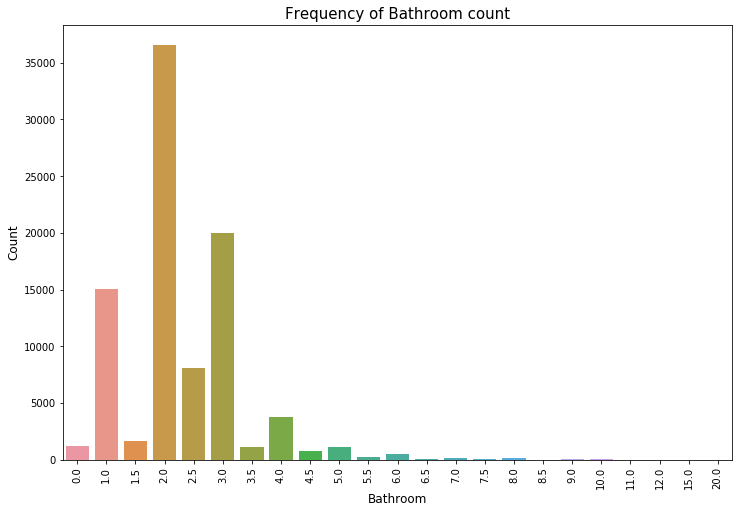

In [70]:

plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

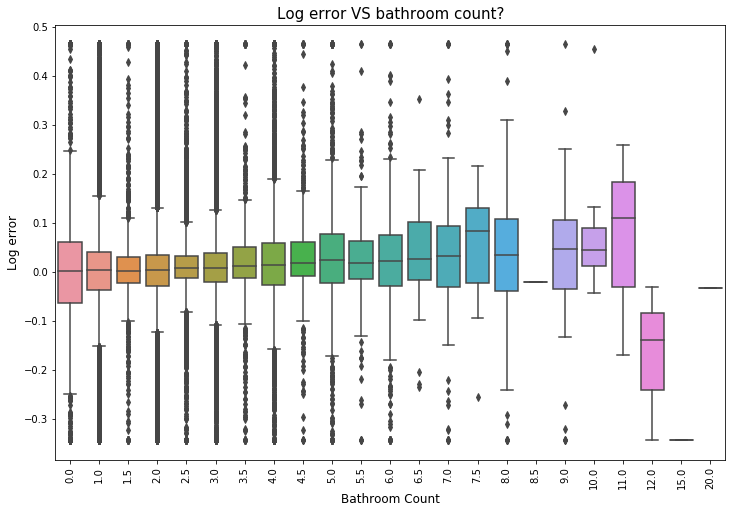

In [71]:

plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train_data)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Log error VS bathroom count?", fontsize=15)
plt.show()

##### Bedroom Count

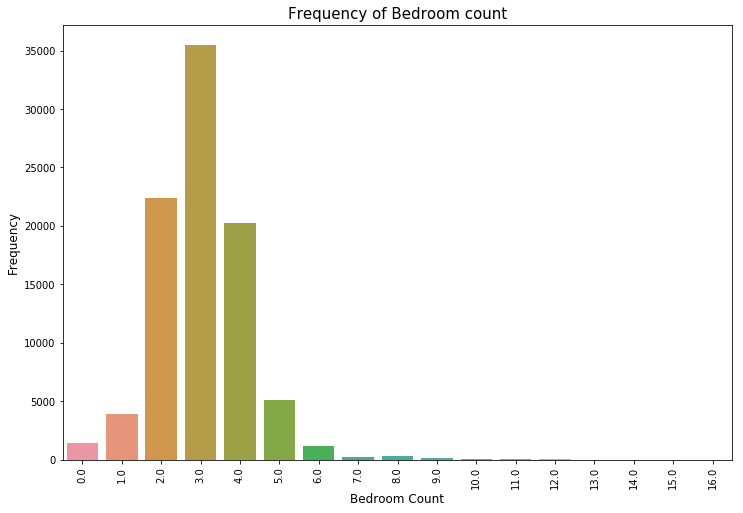

In [72]:

plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


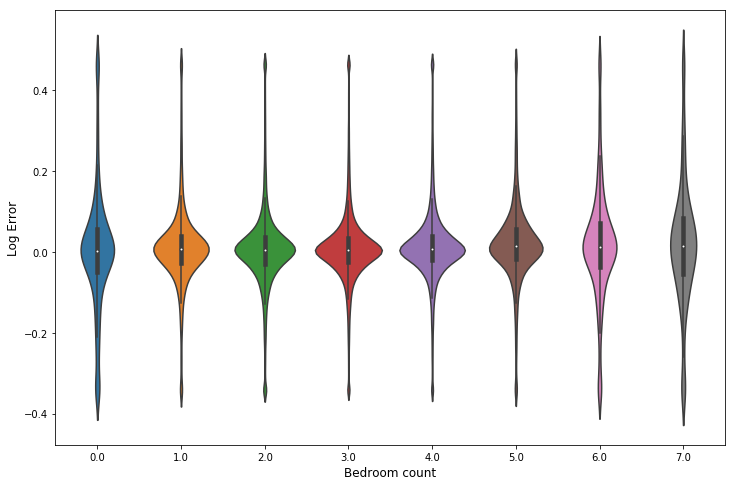

In [73]:

train_data['bedroomcnt'].ix[train_data['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_data)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

##### Taxamount

C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\madhumitha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


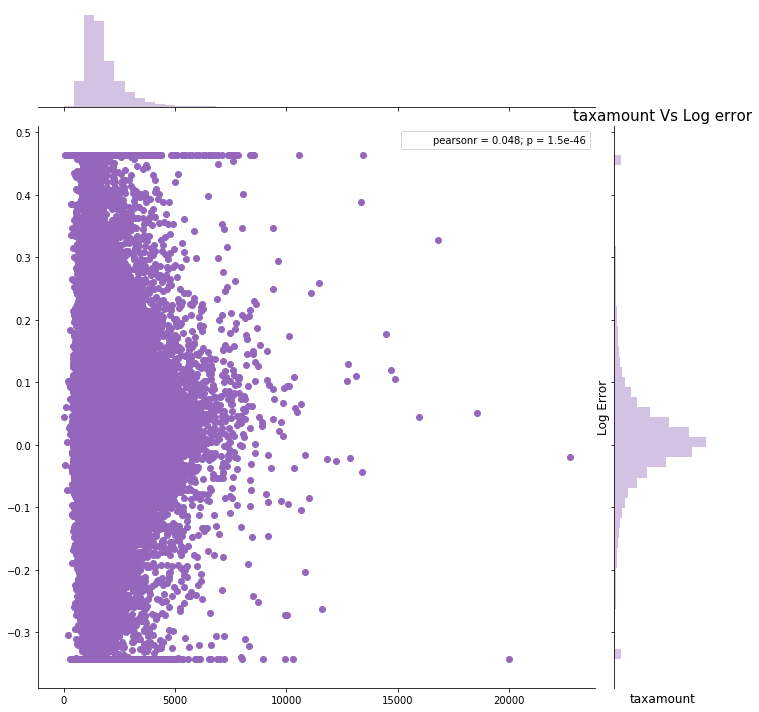

In [74]:
plotFeatureVsLogerror("taxamount")

#### Feature Importance

##### We now have an idea of the relevant features, so now we will drop categorical features to save memory during exceution

In [75]:
#train_y = train_data['logerror'].values
categorical_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_data = train_data.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+categorical_cols, axis=1)
feat_names = train_data.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_data, train_y)



ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features=0.3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Plotting the important features

##### After running the Tree Regressor we get the features with their importance score, which we can use for training the model

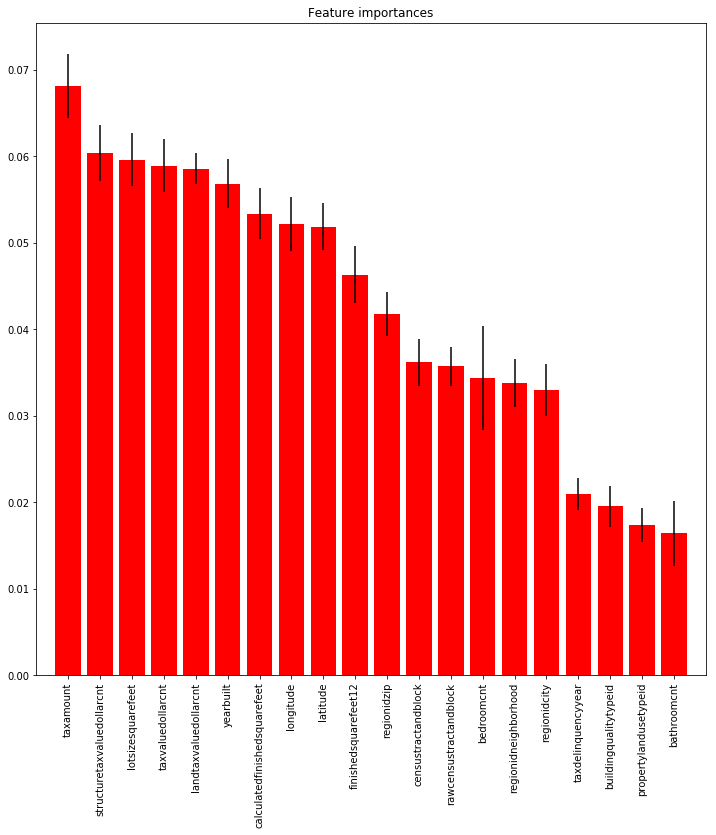

In [76]:
## plot the importances ##
importanceOfFeature = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importanceOfFeature)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importanceOfFeature[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [79]:
importanceOfFeature

array([ 0.01391442,  0.00045286,  0.000873  ,  0.01637558,  0.03431136,
        0.        ,  0.01948904,  0.01558378,  0.        ,  0.00405167,
        0.05336262,  0.04629807,  0.00030215,  0.01094131,  0.00405244,
        0.00329086,  0.00157172,  0.00629777,  0.01403602,  0.00851668,
        0.0110995 ,  0.01354736,  0.0518545 ,  0.05214722,  0.05960186,
        0.        ,  0.00150442,  0.        ,  0.        ,  0.        ,
        0.01731374,  0.03571977,  0.03297897,  0.0017413 ,  0.03376981,
        0.0417529 ,  0.00922994,  0.        ,  0.00377663,  0.00044263,
        0.00827555,  0.00377314,  0.00049708,  0.05680704,  0.00740742,
        0.06038084,  0.05890471,  0.        ,  0.05853824,  0.06810355,
        0.02093378,  0.03617678])